#### Data preprocessing for Breast Cancer Dataset

In [3]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [4]:
# Load the cleaned data set
breast_cancer_df = pd.read_csv('cleaned_breast_cancer_dataset.csv')

In [5]:
# Drop case id as the index
breast_cancer_df = breast_cancer_df.drop('id',axis=1)

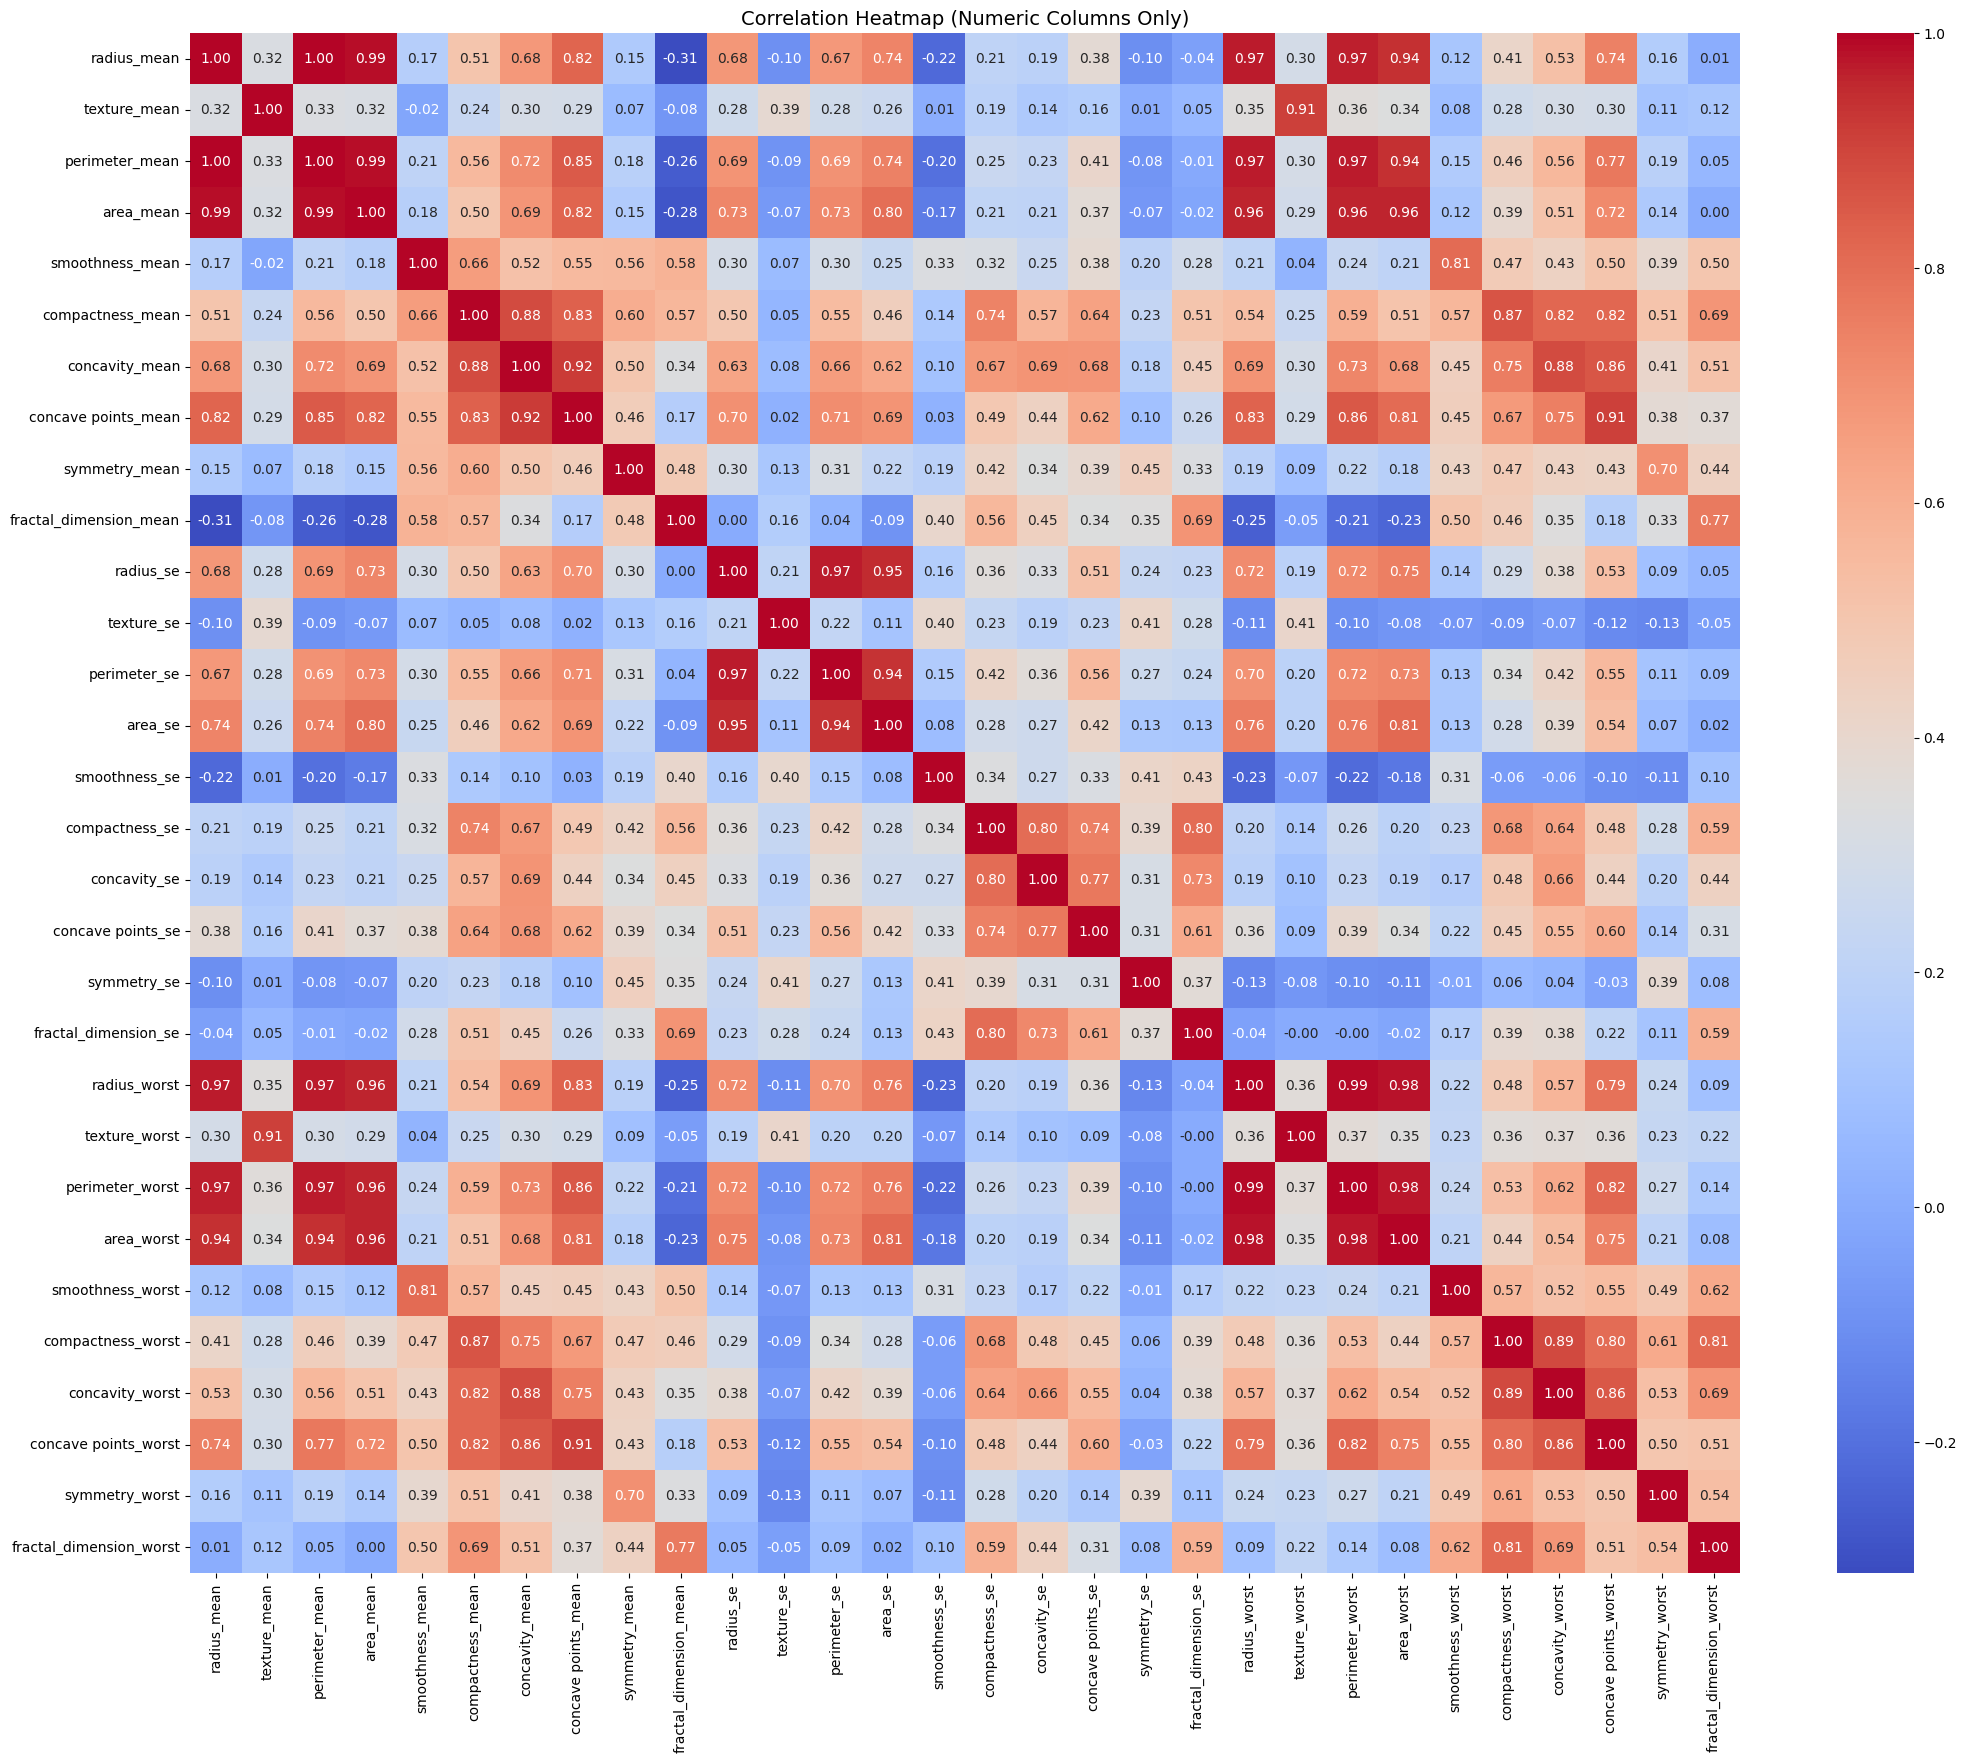

In [6]:
# Select only numeric columns
numeric_df = breast_cancer_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Columns Only)', fontsize=14)
plt.show()

In [7]:
# Select upper triangle only
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Select the high correlated pairs
high_corr = [
    (row, column, upper.loc[row,column])
    for column in upper.columns
    for row in upper.index
    if abs(upper.loc[row, column]) > 0.9
            ]

# Print first 15 pairs
high_corr[:15] 

[('radius_mean', 'perimeter_mean', np.float64(0.9978552814938109)),
 ('radius_mean', 'area_mean', np.float64(0.9873571700566127)),
 ('perimeter_mean', 'area_mean', np.float64(0.9865068039913907)),
 ('concavity_mean', 'concave points_mean', np.float64(0.9213910263788588)),
 ('radius_se', 'perimeter_se', np.float64(0.9727936770160764)),
 ('radius_se', 'area_se', np.float64(0.951830112110991)),
 ('perimeter_se', 'area_se', np.float64(0.9376554069544157)),
 ('radius_mean', 'radius_worst', np.float64(0.9695389726112055)),
 ('perimeter_mean', 'radius_worst', np.float64(0.9694763634663146)),
 ('area_mean', 'radius_worst', np.float64(0.9627460860470841)),
 ('texture_mean', 'texture_worst', np.float64(0.912044588840421)),
 ('radius_mean', 'perimeter_worst', np.float64(0.9651365139559871)),
 ('perimeter_mean', 'perimeter_worst', np.float64(0.9703868870426394)),
 ('area_mean', 'perimeter_worst', np.float64(0.9591195743552645)),
 ('radius_worst', 'perimeter_worst', np.float64(0.993707916102949))]

In [8]:
# Drop columns with high correlation
drop_col = [column for column in upper.columns if any(upper[column] > 0.9)]

new_breast_cancer_df = numeric_df.drop(columns=drop_col)
new_breast_cancer_df

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


In [9]:
# Separate into features and target
y = breast_cancer_df['diagnosis']
X = new_breast_cancer_df

In [10]:
# Display the target
y.head()

0    Malignant
1    Malignant
2    Malignant
3    Malignant
4    Malignant
Name: diagnosis, dtype: object

In [11]:
# Display the features
X

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


In [12]:
# Create a copy of the features and target before scaling
X_copy = X.copy()
y_copy = y.copy()


In [13]:
# Check for class imbalance

weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weights = dict(zip(np.unique(y), weights))
print("Class Weights:", class_weights)

Class Weights: {'Benign': np.float64(0.7969187675070029), 'Malignant': np.float64(1.3419811320754718)}


In [14]:
# First Split: 80% train and 20% test using the scaled dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)


print(f"\nData split results:")
print(f"Training set: {X_train.shape} ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Test set: {X_test.shape} ({(X_test.shape[0]/len(X))*100:.1f}%)")


Data split results:
Training set: (455, 20) (80.0%)
Test set: (114, 20) (20.0%)


In [15]:
# Check class distribution in each set (should be similar due to stratification)
print(f"\nClass distribution verification:")
print("Training set quality distribution:")
print(y_train.value_counts().sort_index())
print("\nTest set quality distribution:")
print(y_test.value_counts().sort_index()) 


Class distribution verification:
Training set quality distribution:
diagnosis
Benign       285
Malignant    170
Name: count, dtype: int64

Test set quality distribution:
diagnosis
Benign       72
Malignant    42
Name: count, dtype: int64


In [16]:
# Fit scaler on training data only (to avoid data leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)


X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Scaling applied successfully")
print(f"Training set scaled -Mean: {X_train_scaled.mean().mean():.4f}, Std {X_train_scaled.std().mean():.4f}")
print(f"Test set scaled -Mean: {X_test_scaled.mean().mean():.4f}, Std {X_test_scaled.std().mean():.4f}")

# Verify scaling worked correctly
print(f"\nScaling verification:")
print(f"Training set - Mean ≈ 0: {abs(X_train_scaled.mean().mean()) < 0.01}")
print(f"Training set - Std ≈ 1: {abs(X_train_scaled.std().mean() - 1) < 0.01}")


Scaling applied successfully
Training set scaled -Mean: 0.0000, Std 1.0011
Test set scaled -Mean: 0.0000, Std 1.0044

Scaling verification:
Training set - Mean ≈ 0: True
Training set - Std ≈ 1: True


In [17]:
print("SAVING PREPROCESSED DATA ")

# Save scaled datasets
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)

# Save target variables
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save preprocessing objects
import joblib
joblib.dump(scaler, 'scaler.pkl')


# Save preprocessing summary
preprocessing_summary = {
    'original_shape': breast_cancer_df.shape,
    'final_shape': new_breast_cancer_df.shape,
    'train_samples': X_train_scaled.shape[0],
    'test_samples': X_test_scaled.shape[0],
    'scaling_method': 'StandardScaler',

}

import json
with open('preprocessing_summary.json', 'w') as f:
    json.dump(preprocessing_summary, f, indent=2)

print("- Preprocessed data saved successfully!")
print("\nFiles created:")
print("- X_train_scaled.csv, X_test_scaled.csv")
print("- y_train.csv, y_test.csv")
print("- scaler.pkl")


SAVING PREPROCESSED DATA 
- Preprocessed data saved successfully!

Files created:
- X_train_scaled.csv, X_test_scaled.csv
- y_train.csv, y_test.csv
- scaler.pkl
